# Importing libraries

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [16]:
from google.colab import files
files.upload()

Saving insurance.csv to insurance (1).csv


{'insurance.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,southwe

In [17]:
df=pd.read_csv("/content/insurance.csv")

# Information of dataset

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
encode=LabelEncoder()

In [21]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [22]:
df["sex"]=encode.fit_transform(df["sex"])
df["smoker"]=encode.fit_transform(df["smoker"])
df["region"]=encode.fit_transform(df["region"])

In [23]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


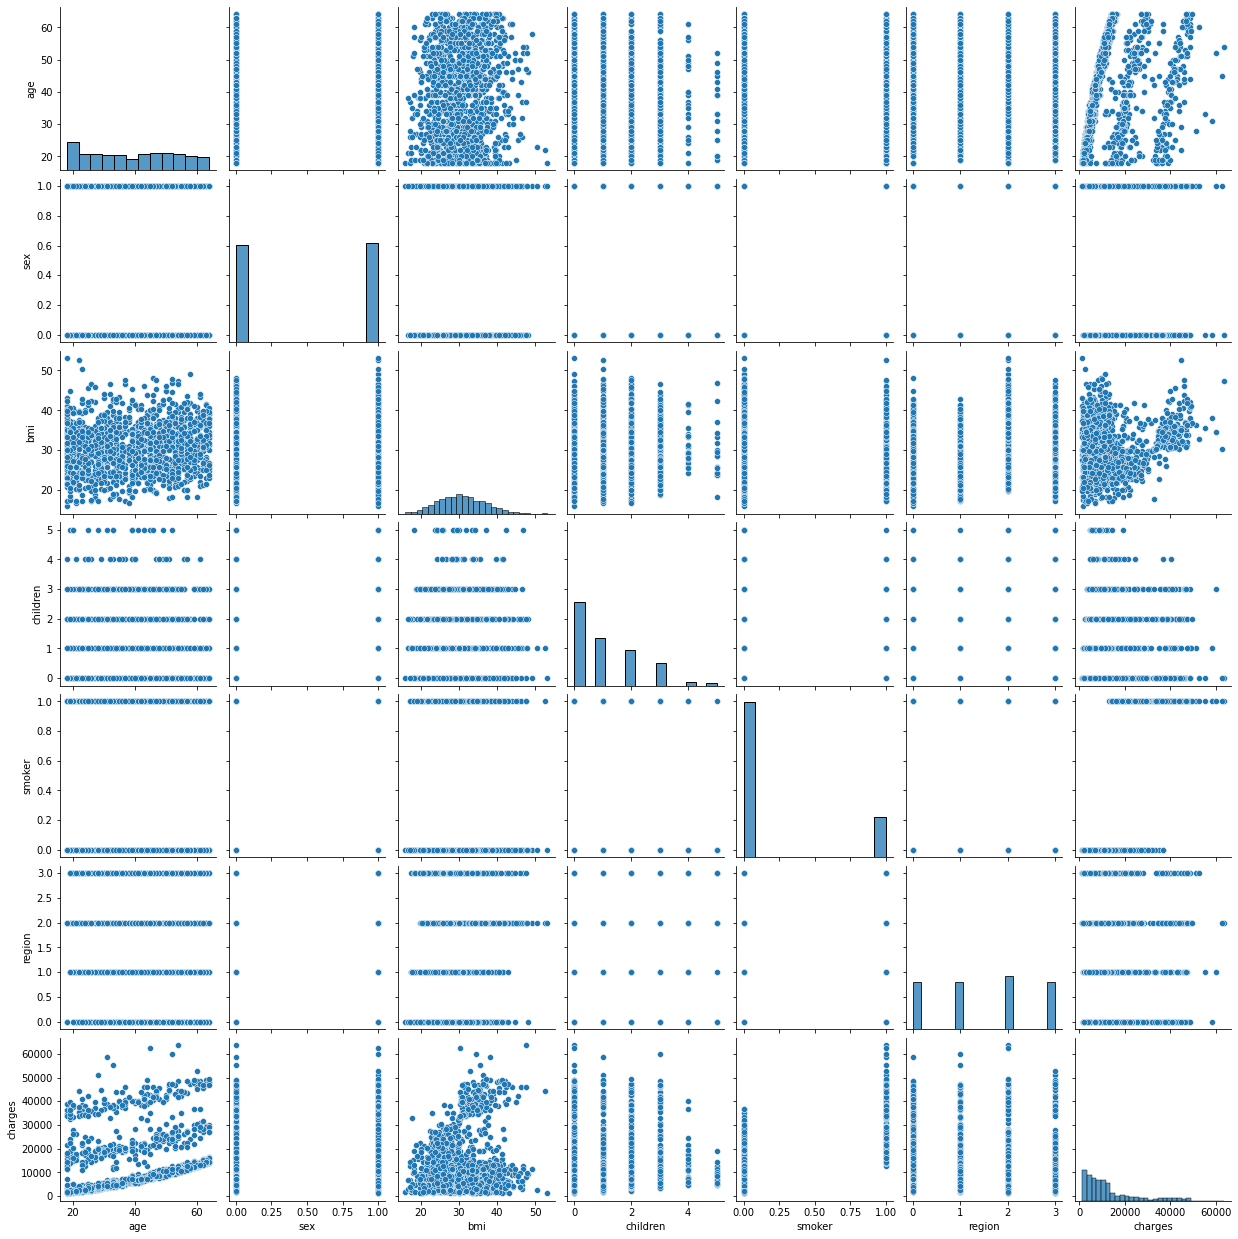

In [24]:
sns.pairplot(df)

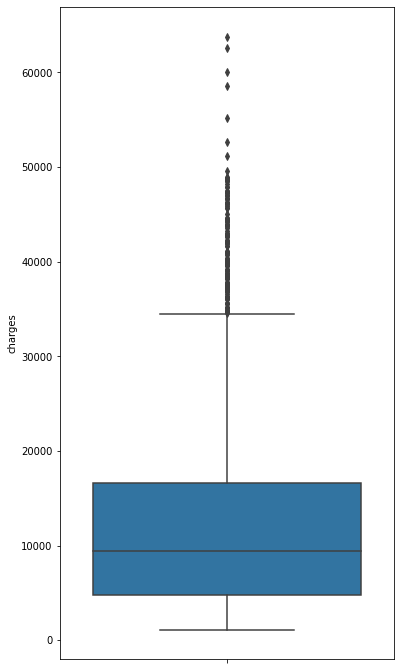

In [25]:
plt.figure(figsize=(6,12))
sns.boxplot(y=df["charges"])

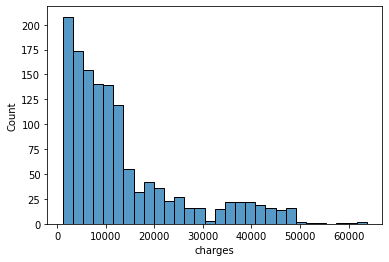

In [40]:
sns.histplot(df["charges"])

In [41]:
df=df[df["charges"]<50000]

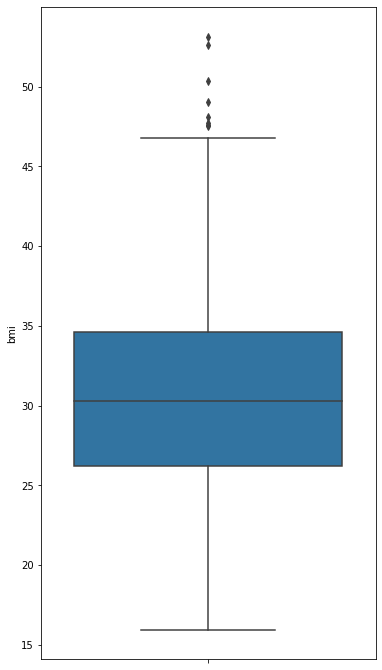

In [42]:
plt.figure(figsize=(6,12))
sns.boxplot(y=df["bmi"])

In [44]:
df=df[df["bmi"]<47]

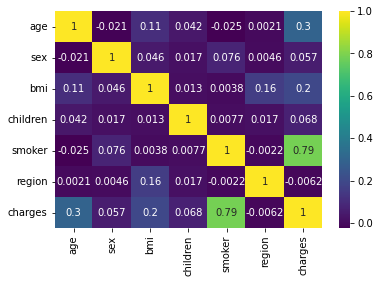

In [27]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")

In [80]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3,)
labels=gm.fit_predict(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


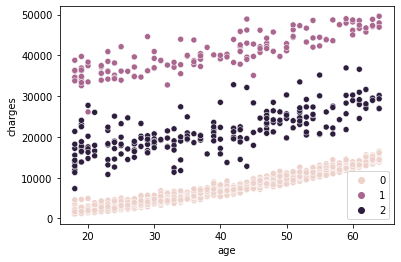

In [82]:
sns.scatterplot(df["age"],df["charges"],hue=labels)

In [83]:
df["labels"]=labels

In [149]:
group1=df[df["labels"]==1]
group2=df[df["labels"]==2]
group3=df[df["labels"]==0]

In [150]:
group1=group1.drop("labels",axis=1)
group2=group2.drop("labels",axis=1)
group3=group3.drop("labels",axis=1)

In [91]:
print(group1.shape)
print(group2.shape)
print(group3.shape)

(141, 7)
(223, 7)
(959, 7)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


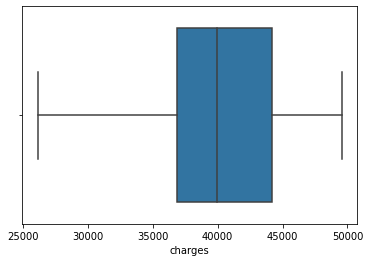

In [154]:
sns.boxplot(group1["charges"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


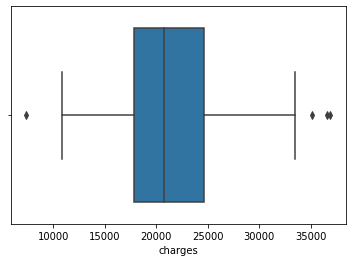

In [155]:
sns.boxplot(group2["charges"])

In [156]:
group2=group2[(group2["charges"]<34900) & (group2["charges"]>10000)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


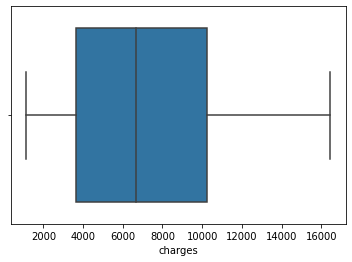

In [135]:
sns.boxplot(group3["charges"])

In [157]:
x=group1.drop("charges",axis=1)
y=group1["charges"]

xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y)

x=group2.drop("charges",axis=1)
y=group2["charges"]

xtrain2,xtest2,ytrain2,ytest2=train_test_split(x,y)

x=group3.drop("charges",axis=1)
y=group3["charges"]

xtrain3,xtest3,ytrain3,ytest3=train_test_split(x,y)

In [163]:
def Model_Constructor(model ,xtrain ,ytrain ,xtest ,ytest ):
  result=model.fit(xtrain,ytrain).predict(xtest)
  print(str(model)+ " results:")
  return (mean_squared_error(result,ytest)**.5)

In [164]:
print("Group1: \n")
m1=Model_Constructor(LinearRegression() , xtrain1, ytrain1, xtest1, ytest1)
print(m1)

print("Group2: \n")
m2=Model_Constructor(LinearRegression() , xtrain2, ytrain2, xtest2, ytest2)
print(m2)

print("Group3: \n")
m3=Model_Constructor(LinearRegression() , xtrain3, ytrain3, xtest3, ytest3)
print(m3)

Group1: 

LinearRegression() results:
1152.6778806168952
Group2: 

LinearRegression() results:
3810.9578190395528
Group3: 

LinearRegression() results:
580.6179218044921


In [165]:
print((m1*len(xtest1)+m2*len(xtest2)+m3*len(xtest3))/(len(xtest1)+len(xtest2)+len(xtest3)))

1179.5993504001863


In [31]:
print("Group1: \n")
m1=Model_Constructor(LinearRegression() , xtrain1, ytrain1, xtest1, ytest1)
print(m1)

print("Group2: \n")
m2=Model_Constructor(LinearRegression() , xtrain2, ytrain2, xtest2, ytest2)
print(m2)

print("Group3: \n")
m3=Model_Constructor(LinearRegression() , xtrain3, ytrain3, xtest3, ytest3)
print(m3)

In [32]:
dtcr=DecisionTreeRegressor()
dtcr_predict=dtcr.fit(xtrain,ytrain).predict(xtest)

In [33]:
sgdr=SGDRegressor()
sgdr_predict=sgdr.fit(xtrain,ytrain).predict(xtest)

In [34]:
lr_score=mean_squared_error(lr_predict,ytest)**.5

In [35]:
knr_score=mean_squared_error(knr_predict,ytest)**.5

In [36]:
dtcr_score=mean_squared_error(dtcr_predict,ytest)**.5

In [37]:
sgdr_score=mean_squared_error(sgdr_predict,ytest)**.5